In [1]:
import cv2 #we're using OpenCV 4
import numpy as np
from matplotlib import pyplot as plt
import os
%matplotlib inline

In [2]:
img = np.zeros((3,3), dtype=np.uint8)
img

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

Each pixel is represented by an integer in the range 0-255, where 0 and 255 correspond to black and white respectively. Numbers in between are shades of gray. Let's convert this grayscale image to a RGB image. The cv2.cvtColor function helps us change from color space to another.

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [4]:
new_img = cv2.imread('skyline.png') #read the image in BGR color format
cv2.imwrite('skyline.jpg',new_img) #convert to jpg and save as skyline.jpg
print(new_img.shape)

(1175, 1739, 3)


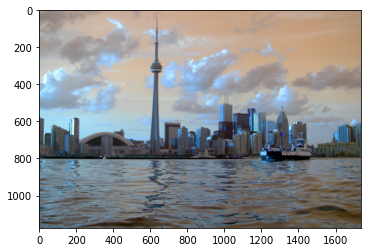

In [5]:
plt.imshow(new_img)
plt.show()
#looks weird, doesn't it? This is because cv2.imread reads in BGR format (reverse of RGB)

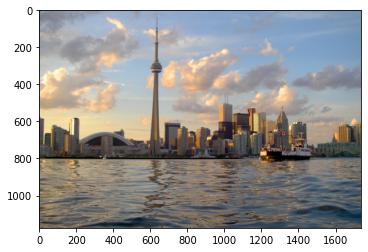

In [6]:
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.show()
#looks better now!

We can also specify the mode of cv2.imread - by default it is cv2.IMREAD_COLOR (3-channel BGR image with an 8 bit-value,i.e. 0-255 for each channel)

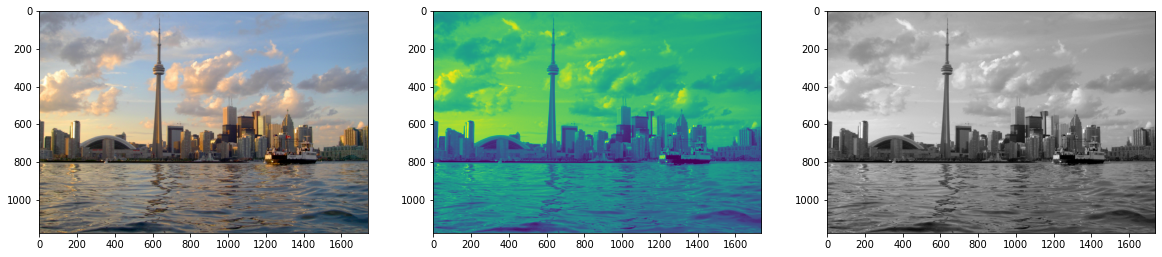

In [7]:
color_img = cv2.imread('skyline.jpg', cv2.IMREAD_COLOR) #default
gray_img = cv2.imread('skyline.jpg', cv2.IMREAD_GRAYSCALE) #8-bit grayscale
cv2.imwrite('skyline_gray.jpg', gray_img)

fig = plt.figure(figsize = (20,20))

ax1 = fig.add_subplot(1,3,1)
ax1.imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)) #color (RGB)
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(gray_img) #not what we want
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(gray_img, cmap = plt.cm.gray) #grayscale

Many other modes are also available, which can be passed as arguments in cv2.imread - such as cv2.IMREAD_UNCHANGED, cv2.IMREAD_ANYDEPTH, cv2.IMREAD_REDUCED_COLOR_2 etc.

Details about these and several other can be found in the documentation! (Look it up if you're interested)

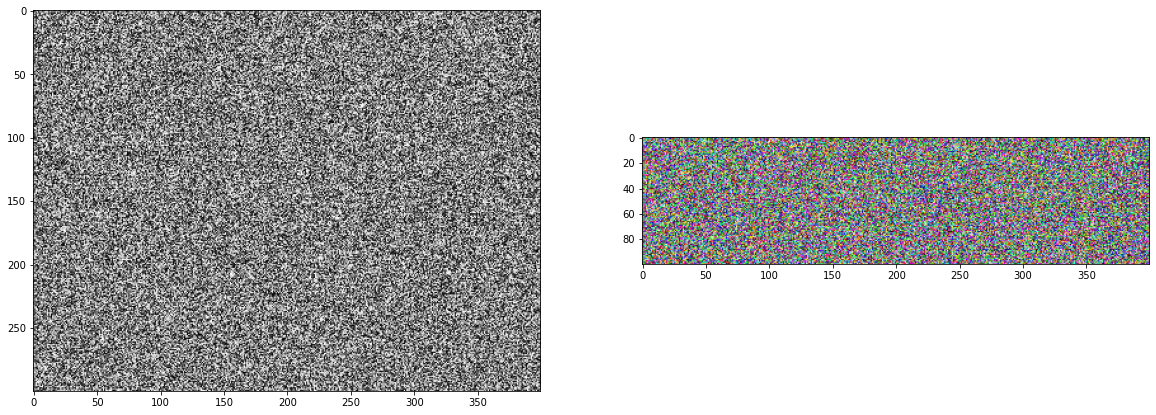

In [8]:
#array of 120000 random bytes
np_rand = np.random.randint(0,256,120000)
#can also do np_rand = np.array(bytearray(os.urandom(120000))) instead

gray_image = np_rand.reshape(300, 400)
cv2.imwrite('random_gray.png', gray_image)
bgr_image = np_rand.reshape(100, 400, 3)
cv2.imwrite('random_bgr.png', bgr_image)

fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(gray_image, cmap = plt.cm.gray)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(bgr_image)

In [9]:
#modifying pixels using numpy
initial = color_img.item(250, 400, 0)
color_img.itemset((250, 400, 0), 248) #sets value to 248
final = color_img.item(250, 400, 0)
print("Initial pixel value is {}, and final pixel value is {}".format(initial, final))

Initial pixel value is 157, and final pixel value is 248


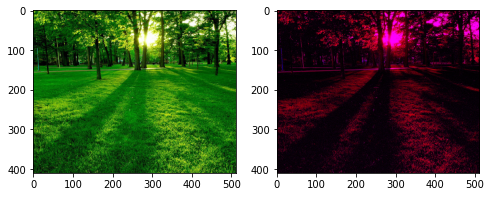

In [10]:
#manipulating ranges
green_pic = cv2.imread('green.jpg')
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(cv2.cvtColor(green_pic, cv2.COLOR_BGR2RGB))
green_pic[:,:,1] = 0 #green channel set to zero
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(cv2.cvtColor(green_pic, cv2.COLOR_BGR2RGB))


In [11]:
# Here's how to display images using cv2 (and not matplotlib) - 
# import cv2
# img = cv2.imread('pic.png')
# cv2.imshow('image', img)
# cv2.waitKey()
# cv2.destroyAllWindows()


(410, 512, 3)
(1175, 1739, 3)


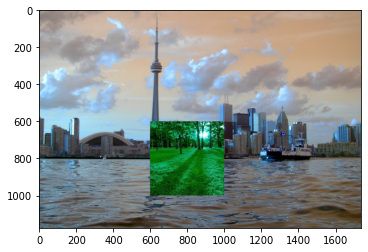

In [12]:
green_pic = cv2.imread('green.jpg')
print(green_pic.shape)
toronto = cv2.imread('skyline.jpg')
print(toronto.shape)
region = green_pic[0:400, 0:400]
toronto[600:1000,600:1000] = region
plt.imshow(toronto)
plt.show()